<a href="https://colab.research.google.com/github/aramos18/MBA-Data-Science/blob/main/DSF1_M%C3%B3dulo_1_Fundamentos_de_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px

In [9]:
# Etapa 1: Coletar e inserir os arquivos
# Supondo que os arquivos foram carregados na plataforma, faremos a leitura deles
df_clientes = pd.read_excel('dados_clientes.xlsx')
df_estados = pd.read_csv('estados_brasileiros.csv',sep=';',decimal=',', encoding='latin-1')
df_idade = pd.read_csv('idade_clientes.csv',sep=';',decimal=',', encoding='latin-1')

In [10]:
# Etapa 2: Análise dos dados coletados
# Vamos visualizar algumas informações dos DataFrames
print("Dados dos Clientes:")
print(df_clientes.head())

Dados dos Clientes:
   id_cliente   peso  colesterol     genero  id_estado
0           1  102.0         111  Masculino         23
1           2  115.0         135  Masculino          7
2           3  115.0         136  Masculino          4
3           4  140.0         167   Feminino         24
4           5  130.0         158  Masculino         26


In [11]:
print("\nEstados Brasileiros:")
print(df_estados.head())


Estados Brasileiros:
   id_estado    estado sigla_estado    pais
0          1      Acre           ac  Brasil
1          2   Alagoas           al  Brasil
2          3     Amapá           ap  Brasil
3          4  Amazonas           am  Brasil
4          5     Bahia           ba  Brasil


In [12]:
print("\nIdade dos Clientes:")
print(df_idade.head())


Idade dos Clientes:
   id_cliente  idade
0           1     17
1           2     28
2           3     62
3           4     55
4           5     44


In [14]:
# Etapa 3: Avaliar a correlação entre as variáveis
#Agrega os dataframes com base no id_estado
df_completo = pd.merge(df_clientes, df_estados, on='id_estado').sort_values(by='id_cliente')


In [15]:
# Agrega os dataframes com base no id_cliente
df_completo = pd.merge(df_completo, df_idade, on='id_cliente').sort_values(by='id_cliente')

In [16]:
# Coloca a sigla dos estados em uppercase
df_completo['sigla_estado'] = df_completo['sigla_estado'].str.upper()

In [17]:
# 2. Analisar os dados coletados.
# Exibe as primeiras linhas
df_completo.head()

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,Roraima,RR,Brasil,17
1,2,115.0,135,Masculino,7,Distrito Federal,DF,Brasil,28
2,3,115.0,136,Masculino,4,Amazonas,AM,Brasil,62
3,4,140.0,167,Feminino,24,Santa Catarina,SC,NaN,55
4,5,130.0,158,Masculino,26,Sergipe,SE,Brasil,44


In [18]:
# Instruções para correção de dados ausentes:
# 1. Para dados de estados utilize a estratégia de exclusão dos dados.
# 2. Para os dados de clientes utilize:
# a. Mediana arredondada para duas casas decimais para as variáveis do tipo numéricas.
# b. Moda para as variáveis categóricas.
# Tratamento dos dados faltantes
df_completo.isnull().sum()

id_cliente       0
peso             5
colesterol       0
genero           0
id_estado        0
estado           0
sigla_estado     0
pais            45
idade            0
dtype: int64

In [ ]:
# Exibe os dados faltantes na coluna pais
#df_completo[df_completo['pais'].isna()]

In [20]:
# Considerando que todos os estados são do Brasil, preenche os dados faltantes com 'Brasil'.
df_completo['pais'] = df_completo['pais'].fillna('Brasil')

In [ ]:
# Exibe os dados faltantes na coluna peso
#df_completo[df_completo['peso'].isna()]

In [22]:
# Calcula a mediana e imputa os dados faltantes
median = df_completo['peso'].median().round(2)
df_completo['peso'].fillna(median, inplace=True)

In [23]:
# 3. Avaliar a correlação entre as variáveis.
df_completo[['peso', 'idade', 'colesterol']].corr()

,peso,idade,colesterol
peso,1.000000,-0.011859,0.984517
idade,-0.011859,1.000000,-0.015716
colesterol,0.984517,-0.015716,1.000000


In [24]:
# 4. Criar algoritmo de k-means com as configurações:
# a. random_state=0, init='k-means++'
from sklearn.cluster import KMeans

In [25]:
# Utilize as variáveis de idade e colesterol.
wcss = []
n_clusters = range(1, 11)
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10, random_state=0, init='k-means++')
    # kmeans.fit(df_completo[['peso', 'idade', 'colesterol']])
    kmeans.fit(df_completo[['idade', 'colesterol']])
    wcss.append(kmeans.inertia_)
    print(f'Número de clusters: {n}\tInércia: {kmeans.inertia_:.2f}')

Número de clusters: 1	Inércia: 962234.56
Número de clusters: 2	Inércia: 328777.81
Número de clusters: 3	Inércia: 209073.67
Número de clusters: 4	Inércia: 171341.02
Número de clusters: 5	Inércia: 140519.55
Número de clusters: 6	Inércia: 113167.01
Número de clusters: 7	Inércia: 92826.28
Número de clusters: 8	Inércia: 77089.24
Número de clusters: 9	Inércia: 66724.14
Número de clusters: 10	Inércia: 58936.70


Text(0, 0.5, 'WCSS')

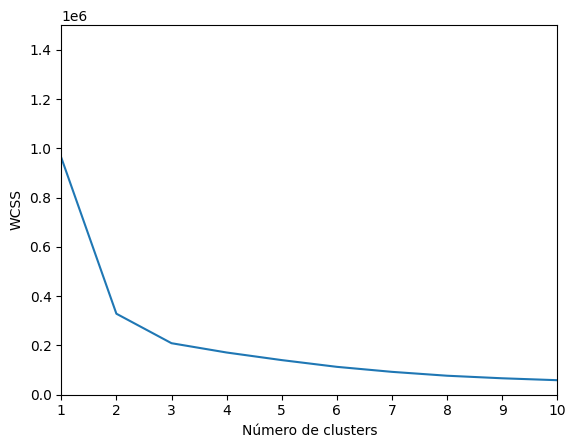

In [26]:
# Plota curva do cotovelo
import matplotlib.pyplot as plt
plt.plot(n_clusters, wcss);
plt.axis([1, 10, 0, 1.5e6])
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

In [27]:
# Pergunta 1)
# Analisando a base de clientes no momento da coleta dos dados, sem nenhum tratamento,
# qual é a média da variável colesterol?
print(f'Média do colesterol: {df_completo["colesterol"].mean():.2f}')


Média do colesterol: 170.43


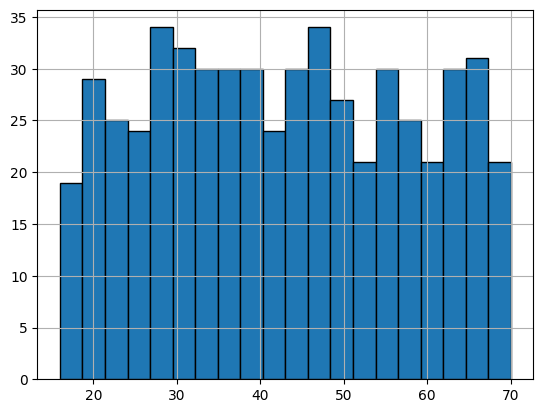

In [28]:
# Pergunta 2)
# Crie um histograma baseado na idade dos clientes e escolha alternativa que melhor
# a representa. Utilize 20 barras na visualização ** bins=20
df_completo['idade'].hist(bins=20, edgecolor='black');

In [ ]:
# Pergunta 3)
# Qual comando abaixo realiza a correção de dados ausentes e aplica a alteração no
# mesmo dataset?
# df.altura.fillna(round(media,2), inplace=True)

In [29]:
# Pergunta 4)
# Crie o gráfico de WCSS para um conjunto de 10 clusters e, após análise dos dados no
# gráfico, responda: qual é o valor de WCSS para cluster de número 6?
# Considere apenas os 3 primeiros dígitos apresentados no gráfico.
n = 6
print(f'Número de clusters: {n}\tInércia: {str(wcss[n-1])[:3]}')

Número de clusters: 6	Inércia: 113


In [30]:
# Pergunta 5
# Crie uma representação gráfica da formação do cluster. Após isso, escolha a imagem
# correta para esse agrupamento. Considere no eixo x o peso dos clientes e no eixo y
# o colesterol.
# Crie o modelo KMeans com o número ideal de clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0, init='k-means++')
y_kmeans = kmeans.fit_predict(df_completo[['idade', 'colesterol']])
centers = kmeans.cluster_centers_

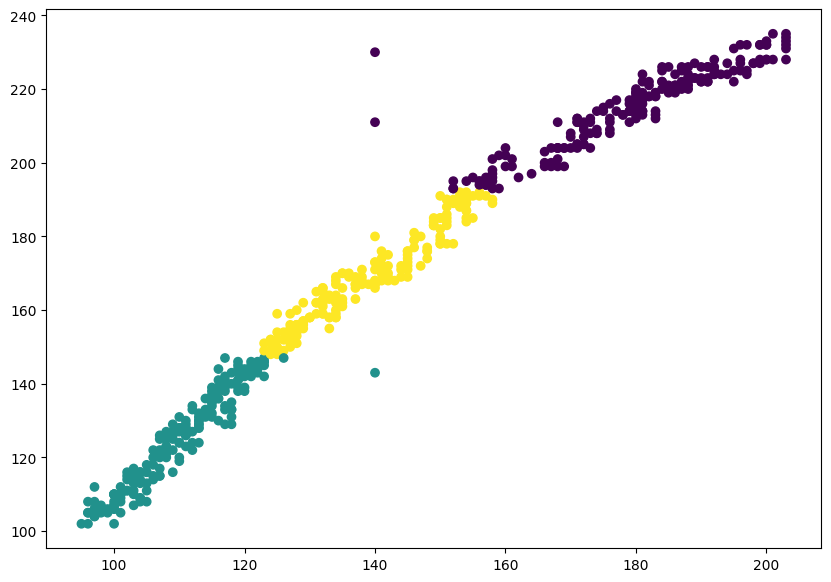

In [31]:
# Crie o gráfico
plt.figure(figsize=(10, 7))
plt.scatter(df_completo['peso'], df_completo['colesterol'], c=y_kmeans, cmap='viridis')

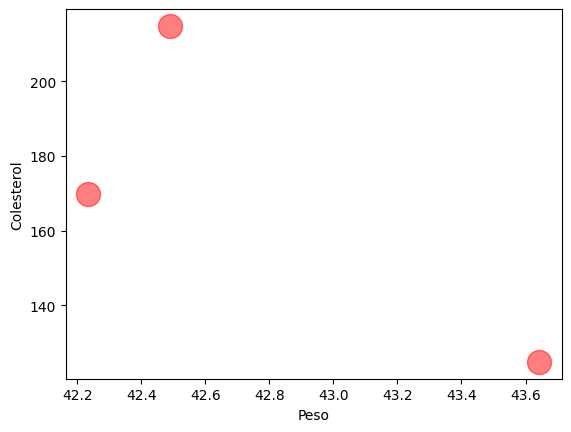

In [33]:
# Desenhe os centros dos clusters
#plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5)
#plt.xlabel('Peso')
#plt.ylabel('Colesterol')
#plt.show()

In [34]:
# Pergunta 6)
# Após aplicar o algoritmo de agrupamento, gere uma estatística com a função describe da
# variável peso, agrupando os resultados por cluster, e responda a alternativa CORRETA.
df_completo['id_risco'] = y_kmeans
df_completo['risco'] = df_completo['id_risco'].map({0: 'alto', 1: 'baixo', 2: 'moderado'})


In [35]:
# Gere estatísticas descritivas agrupadas por cluster
stats = df_completo.groupby('risco')['peso'].describe()
print(stats)

          count        mean        std    min     25%    50%    75%    max
risco                                                                     
alto      190.0  179.142105  13.789261  140.0  170.25  180.5  189.0  203.0
baixo     182.0  109.873626   7.975132   95.0  103.00  110.0  116.0  140.0
moderado  175.0  139.491429   9.908703  123.0  131.00  140.0  149.0  158.0


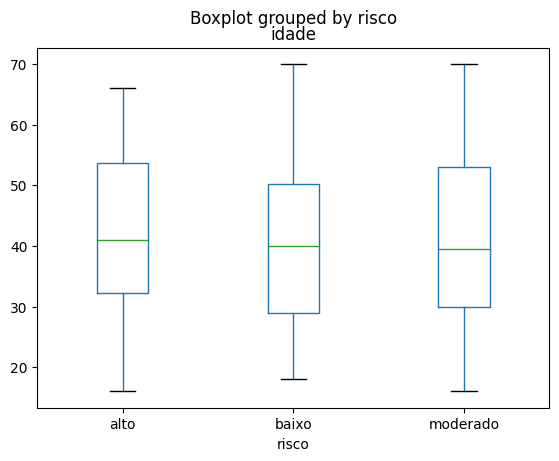

In [36]:
# Pergunta 7)
# Gera um diagrama de boxplot filtrando todos os gêneros feminino da base criada e assinale a
# alternativa que apresenta o resultado das variáveis idade e nome do cluster.
df_completo[df_completo['genero'] == 'Feminino'].boxplot(by='risco', column=['idade'], grid=False);

In [37]:
# Pergunta 8)
# Qual a quantidade de pessoas do gênero feminino presentes no cluster de risco baixo?
n_fem_baixo_risco = len(df_completo.query('genero == "Feminino" & risco == "baixo"'))
print(f'Quantidade de pessoas do gênero feminino presentes no cluster de risco baixo: {n_fem_baixo_risco}')

Quantidade de pessoas do gênero feminino presentes no cluster de risco baixo: 80


In [38]:
# Pergunta 9)
# Qual estado possui maior número de pessoas no grupo de risco moderado?
df_completo[df_completo['risco'] == 'moderado']['estado'].value_counts()

Mato Grosso do Sul     12
Goiás                  11
Roraima                10
Minas Gerais           10
Espírito Santo          9
Rondônia                8
Rio Grande do Sul       8
Ceará                   8
Santa Catarina          8
Piauí                   7
Sergipe                 7
Bahia                   7
Pernambuco              7
Pará                    6
Alagoas                 6
Maranhão                6
Rio Grande do Norte     5
Paraná                  5
Acre                    5
Tocantins               5
Amapá                   4
Rio de Janeiro          4
São Paulo               4
Amazonas                4
Distrito Federal        3
Mato Grosso             3
Paraíba                 3
Name: estado, dtype: int64

In [39]:
# Pergunta 10)
# Qual é o terceiro estado que possui a maior média de colesterol?
df_completo.groupby('estado')['colesterol'].mean().sort_values(ascending=False).round(2)

estado
Mato Grosso            186.33
Rio Grande do Sul      185.38
Pernambuco             180.18
Espírito Santo         179.11
Pará                   178.95
São Paulo              176.67
Distrito Federal       175.95
Alagoas                174.67
Tocantins              174.26
Santa Catarina         172.73
Ceará                  171.40
Rondônia               170.90
Sergipe                170.47
Paraíba                169.88
Amapá                  169.76
Minas Gerais           168.52
Mato Grosso do Sul     167.82
Piauí                  166.17
Paraná                 165.89
Rio de Janeiro         165.30
Maranhão               164.95
Amazonas               164.88
Roraima                164.78
Bahia                  164.44
Rio Grande do Norte    163.21
Acre                   162.50
Goiás                  154.09
Name: colesterol, dtype: float64

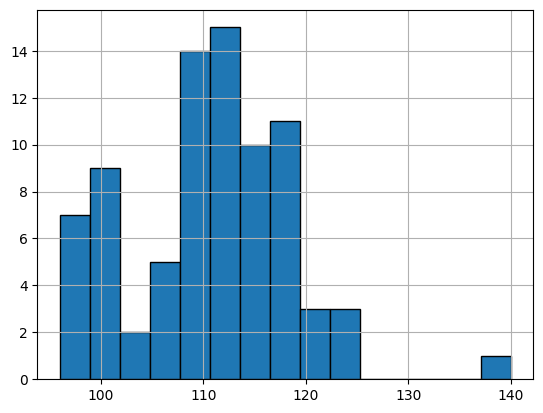

In [40]:
# Pergunta 11)
# Filtre o dataframe para todas as pessoas do gênero feminino que estão no cluster de baixo
# risco e em seguida crie um histograma com a variável peso para esse conjunto de dados.
# Utilize 15 barras na representação do gráfico
df_completo.query('genero == "Feminino" & risco == "baixo"')['peso'].hist(bins=15, edgecolor='black');

In [ ]:
# Pergunta 12)
# São exemplos de aprendizado supervisionado:
# R: Regressão e Classificação.

In [ ]:
# Pergunta 13)
# Assinale a alternativa CORRETA:
# R: A clusterização k-means é uma técnica poderosa e eficiente para segmentar dados e identificar
# padrões relevantes em conjuntos de informações complexas.


In [ ]:
# Pergunta 14)
# Os algoritmos de aprendizado não supervisionado podem ser divididos em duas classes: Associação e
# Clusterização, que se definem respectivamente como:
# R: Os algoritmos de associação permitem o descobrimento de regras e correlação em uma base de dados,
# identificando conjuntos de itens que ocorrem juntos dentro de uma determinada frequência e os algoritmos
# de clusterização ou agrupamento permitem que seja feito agrupamento de grupos com base nas semelhanças
# encontradas.

In [ ]:
# Pergunta 15
# Sobre a MAE, indique a opção que contém sua equação.
# R: MAE = (1/n) * Σ|y_i - ŷ_i|